In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('/content/best_sellers_amazon_2024_sunglasses.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           260 non-null    object 
 1   brand           260 non-null    object 
 2   description     84 non-null     object 
 3   price/currency  100 non-null    object 
 4   price/value     100 non-null    float64
 5   stars           259 non-null    float64
 6   reviewsCount    259 non-null    float64
dtypes: float64(3), object(4)
memory usage: 14.3+ KB


In [5]:
data

,title,brand,description,price/currency,price/value,stars,reviewsCount
0,SOJOS Retro Polarized Aviator Sunglasses for W...,SOJOS,NaN,NaN,NaN,4.4,8032.0
1,WearMe Pro - Reflective Lens Round Trendy Sung...,WearMe Pro,NaN,NaN,NaN,4.5,19647.0
2,TURBOPEP Square Polarized Sunglasses for Men a...,TURBOPEP,NaN,NaN,NaN,4.5,475.0
3,Locs Gangster Oversized Rectangular Horn Rim S...,Locs,Macho men's authentic OG Locs gangster shades ...,$,7.350,4.5,3090.0
4,ATTCL Polarized Wrap Sunglasses For Men - Fish...,ATTCL,NaN,NaN,NaN,4.4,6299.0
...,...,...,...,...,...,...,...
255,SA106 Mens Retro Vintage Narrow Rectangular Pi...,SA106,NaN,NaN,NaN,4.4,419.0
256,"Dockers Men's Gavin Sunglasses Polarized Wrap,...",Dockers,Feel comfortable during sports and active adve...,$,13.970,4.4,100.0
257,SUNGAIT Polygon Aviator Sunglasses for Men Pol...,SUNGAIT,NaN,NaN,NaN,4.5,1003.0
258,Ray-Ban Rb4171 Erika Round Sunglasses,Ray-Ban,Modern classics with an open-minded personalit...,$,0.007,4.6,11493.0


In [6]:
data.isna().sum()

,0
title,0
brand,0
description,176
price/currency,160
price/value,160
stars,1
reviewsCount,1


In [8]:
# Find number of unique products
unique_products = data['title'].nunique()
print("Number of unique sunglasses products:", unique_products)

Number of unique sunglasses products: 257


In [9]:
# Find number of unique brands
unique_brands = data['brand'].nunique()
print("Number of unique brands:", unique_brands)

Number of unique brands: 130


In [10]:
# Number of products per brand
brands = data["brand"].value_counts().reset_index()
brands.columns = ['Brand', 'Number of Products']

# Print the result as a DataFrame
print("Number of products per brand:")
print(brands.to_string(index=False))

Number of products per brand:
              Brand  Number of Products
              SOJOS                  19
            Ray-Ban                  18
             Oakley                  10
           KALIYADI                   7
           ROCKBROS                   5
A｜X ARMANI EXCHANGE                   5
           KastKing                   5
            MEETSUN                   4
             CARFIA                   4
             Joopin                   4
               DUCO                   4
              LUENX                   4
         STORYCOAST                   4
               Locs                   4
       grinderPUNCH                   4
            SUNGAIT                   4
              ATTCL                   4
             FAGUMA                   3
             BIRCEN                   3
            IRONMAN                   3
              Goodr                   3
       JULI Eyewear                   3
           ZENOTTIC                   3
          

In [13]:
# Top 5 brands
top_brands = brands.head(5)
print("Top 5 brands:")
print(top_brands.to_string(index=False))

Top 5 brands:
   Brand  Number of Products
   SOJOS                  19
 Ray-Ban                  18
  Oakley                  10
KALIYADI                   7
ROCKBROS                   5


In [15]:
# Check currencies
currency = data["price/currency"].unique()
print(currency)

[nan '$']


In [17]:
# Filter rows with missing values in 'currency' or 'price/value'
missing_values_data = data[data['price/currency'].isna() | data['price/value'].isna()]

# Display the brands and products with missing values
print("Brands and Products with Missing Values:")
print(missing_values_data[['brand', 'title']])

Brands and Products with Missing Values:
                   brand                                              title
0                  SOJOS  SOJOS Retro Polarized Aviator Sunglasses for W...
1             WearMe Pro  WearMe Pro - Reflective Lens Round Trendy Sung...
2               TURBOPEP  TURBOPEP Square Polarized Sunglasses for Men a...
4                  ATTCL  ATTCL Polarized Wrap Sunglasses For Men - Fish...
5                  SOJOS  SOJOS Classic Square Sunglasses for Women Men ...
..                   ...                                                ...
253              ARNETTE     ARNETTE An4202 Fastball Rectangular Sunglasses
254  A｜X ARMANI EXCHANGE  A｜X ARMANI EXCHANGE Men's Ax2034s Aviator Sung...
255                SA106  SA106 Mens Retro Vintage Narrow Rectangular Pi...
257              SUNGAIT  SUNGAIT Polygon Aviator Sunglasses for Men Pol...
259             KANASTAL  KANASTAL Round Sunglasses Polarized for Men Wo...

[160 rows x 2 columns]


In [18]:
# Find the highest and lowest prices and their corresponding products and brand
highest_price = data[data['price/value'] == data['price/value'].max()]
lowest_price = data[data['price/value'] == data['price/value'].min()]

print("Highest price and corresponding product:")
print(highest_price[['title', 'brand', 'price/value']])
print("\nLowest price and corresponding product:")
print(lowest_price[['title', 'brand', 'price/value']])

Highest price and corresponding product:
                                                 title  brand  price/value
214  Gucci GG 0010 S- 001 BLACK/GREY Sunglasses,mal...  Gucci        195.0

Lowest price and corresponding product:
                                                 title          brand  \
109  Oakley Man Sunglasses Matte Black Frame, Grey ...         Oakley   
145                     Ray-Ban Rb3025 Classic Aviator        Ray-Ban   
154  Ray-Ban Man Sunglasses Black Frame, Green Lens...        Ray-Ban   
174  Costa Del Mar Men's Rincon Fishing and Watersp...  Costa Del Mar   
200  Bnus italy made classic sunglasses corning rea...        B.N.U.S   
216  Ray-Ban RB3364 Metal Polarized Rectangular Sun...        Ray-Ban   
241            Ray-Ban RB3267 Metal Aviator Sunglasses        Ray-Ban   
258              Ray-Ban Rb4171 Erika Round Sunglasses        Ray-Ban   

     price/value  
109        0.007  
145        0.007  
154        0.007  
174        0.007  
200        0.00

In [19]:
def plot_distribution(dataframe, column_name):
    """
    Generate a distribution visualization for the given column in the DataFrame.

    Parameters:
    - dataframe: pd.DataFrame, the DataFrame containing the data
    - column_name: str, the name of the column to visualize
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(dataframe[column_name], kde=True, color='skyblue')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

In [20]:
data.columns

Index(['title', 'brand', 'description', 'price/currency', 'price/value',
       'stars', 'reviewsCount'],
      dtype='object')

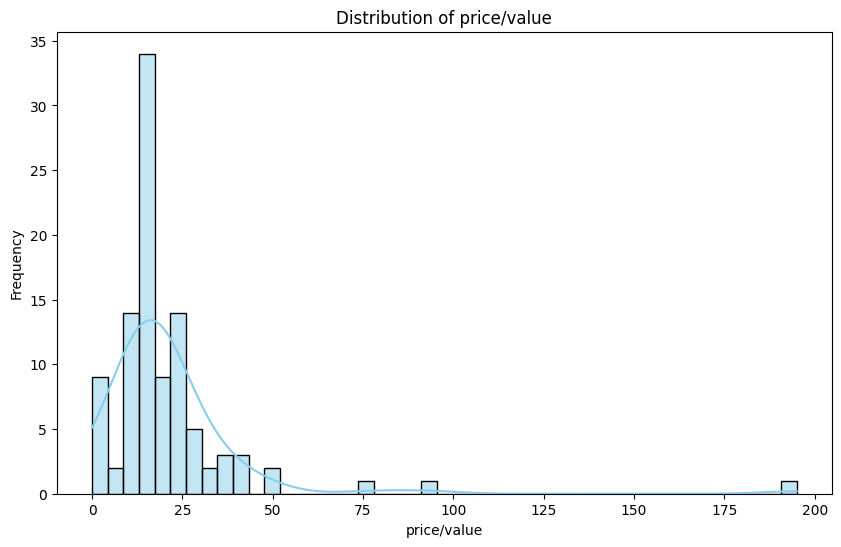

In [22]:
plot_distribution(data, "price/value")

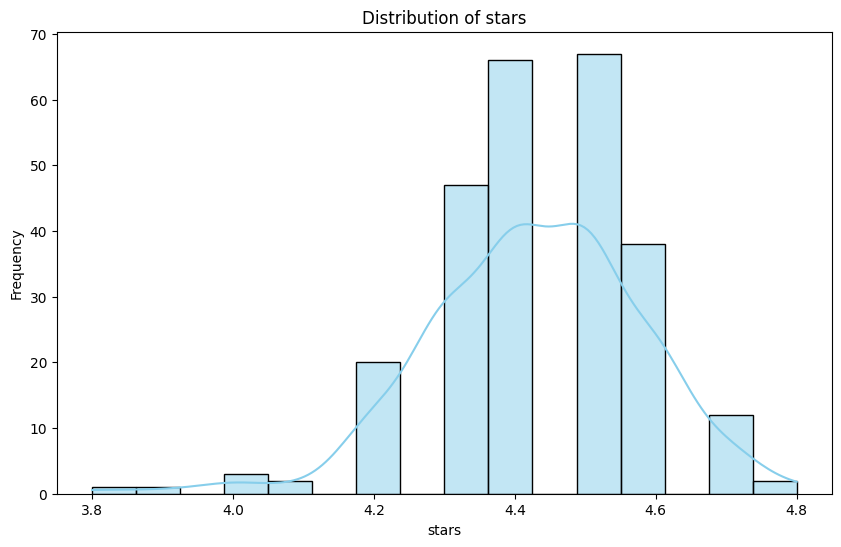

In [23]:
plot_distribution(data, "stars")

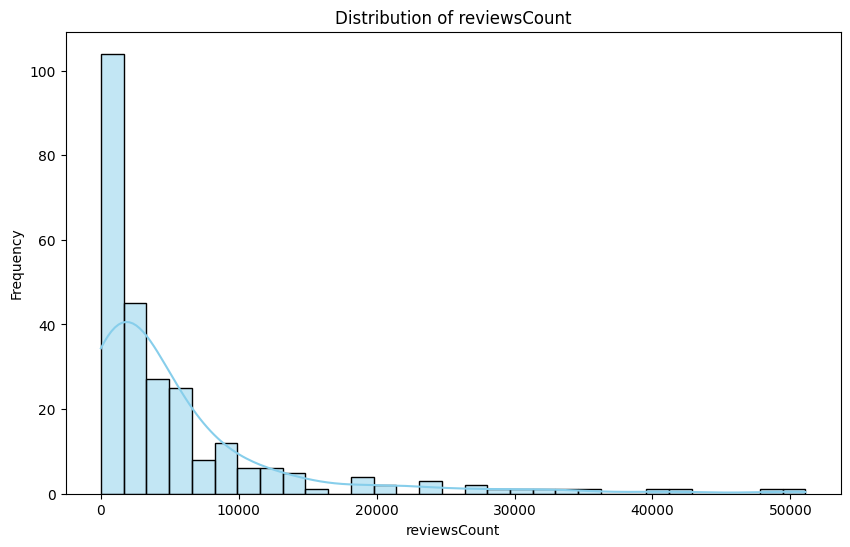

In [24]:
plot_distribution(data, "reviewsCount")

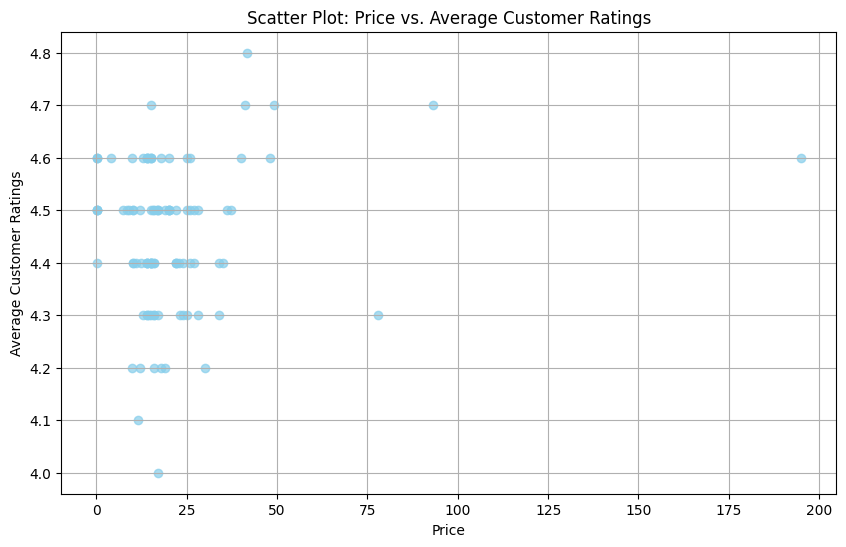

In [25]:
# Find Relationship between Price and Average rating
plt.figure(figsize=(10, 6))
plt.scatter(data['price/value'], data['stars'], color='skyblue', alpha=0.7)
plt.title('Scatter Plot: Price vs. Average Customer Ratings')
plt.xlabel('Price')
plt.ylabel('Average Customer Ratings')
plt.grid(True)
plt.show()

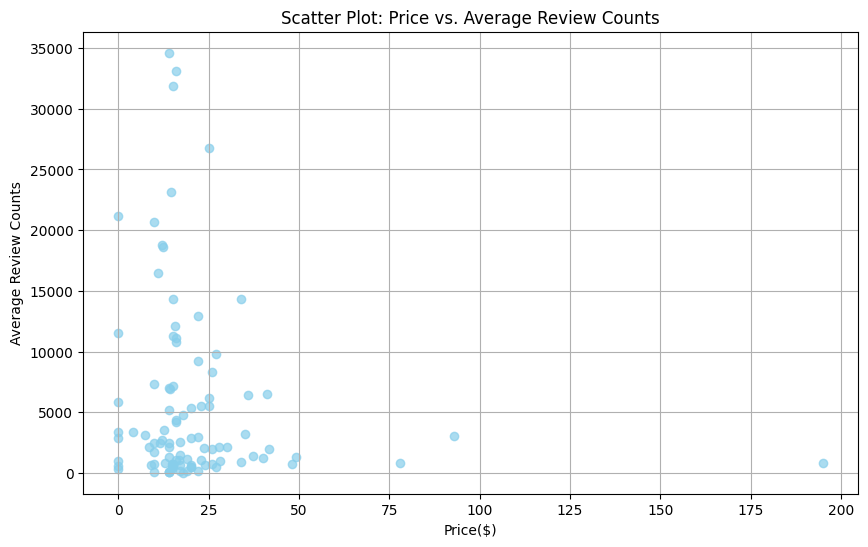

In [27]:
# Find Relationship between Price and Average rating
plt.figure(figsize=(10, 6))
plt.scatter(data['price/value'], data['reviewsCount'], color='skyblue', alpha=0.7)
plt.title('Scatter Plot: Price vs. Average Review Counts')
plt.xlabel('Price($)')
plt.ylabel('Average Review Counts')
plt.grid(True)
plt.show()

<ipython-input-28-037ec406885d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


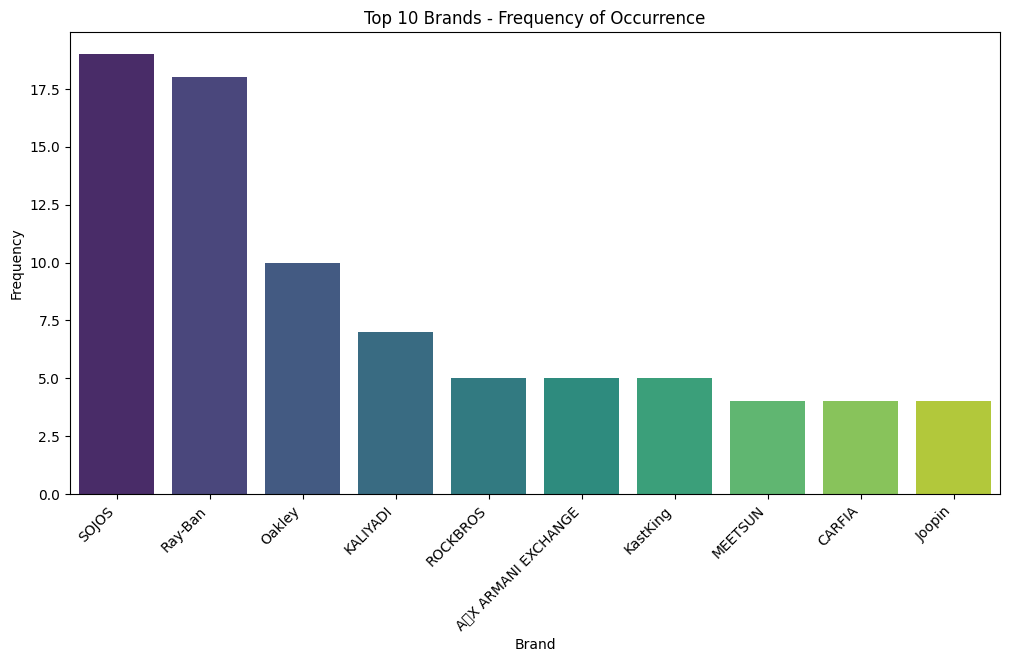

In [28]:
# Visualization for top brands frequency
plt.figure(figsize=(12, 6))
top_brands = data['brand'].value_counts().head(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
plt.title('Top 10 Brands - Frequency of Occurrence')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
# Get the top 10 brands by frequency of occurrence
top_brands = data['brand'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 brands
df_top_brands = data[data['brand'].isin(top_brands)]

# Create a violin plot using Plotly
fig = px.violin(df_top_brands, x='brand', y='price/value', box=True, points="all", color='brand',
                title='Price Distribution Among Top 10 Brands', labels={'brand': 'Brand', 'price/value': 'Price'})
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()

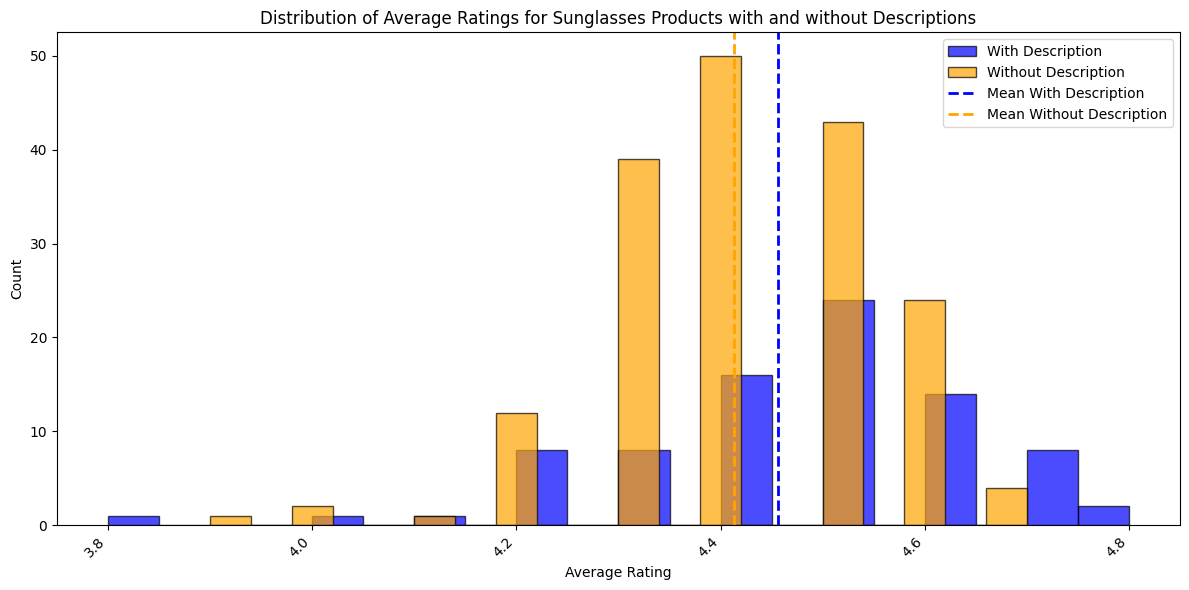

In [32]:
# Create separate DataFrames for products with and without descriptions
with_description = data[data['description'].notnull()]
without_description = data[data['description'].isnull()]

# Plotting the histogram
plt.figure(figsize=(12, 6))

# Histogram for products with descriptions
plt.hist(with_description['stars'], bins=20, alpha=0.7, label='With Description', edgecolor='black', color='blue')

# Histogram for products without descriptions
plt.hist(without_description['stars'], bins=20, alpha=0.7, label='Without Description', edgecolor='black', color='orange')

# Add a vertical line for the mean of each group
plt.axvline(with_description['stars'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean With Description')
plt.axvline(without_description['stars'].mean(), color='orange', linestyle='dashed', linewidth=2, label='Mean Without Description')

plt.title('Distribution of Average Ratings for Sunglasses Products with and without Descriptions')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()